In [12]:
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Step 1: Load and preprocess the dataset
data = pd.read_csv('train_data.csv')
text = data['Word'].values
labels = data['Sentiment'].values

# Step 2: Convert text data into numerical feature vectors
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(text)

# Step 3: Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(features, labels)

# Step 4: Predict sentiment on new data
new_text = ["I love this movie!", "This product is terrible.", "The food was delicious."]
new_features = vectorizer.transform(new_text)
print(new_features)
# new_predictions = nb.predict(new_features)
# print(new_predictions)

# # Step 5: Generate the classification report to evaluate the model
# predictions = nb.predict(features)
# print(classification_report(labels, predictions))

  (1, 376)	1


In [10]:
file_name = 'feedback_data.csv'
data_frame = pd.read_csv(file_name)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   feedback_id  1000 non-null   int64 
 1   manager_id   1000 non-null   int64 
 2   date         1000 non-null   object
 3   employee_id  1000 non-null   int64 
 4   feedback     1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


<Axes: xlabel='manager_id', ylabel='count'>

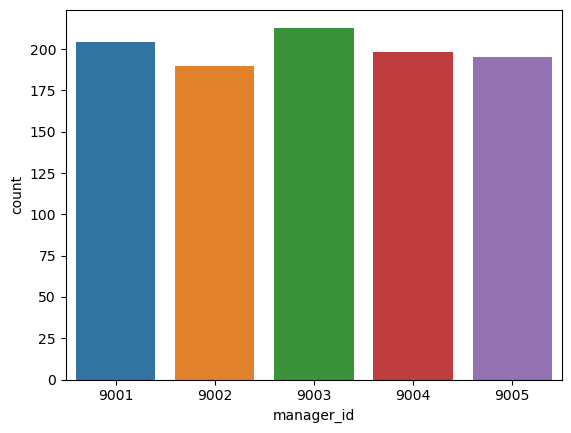

In [6]:
manager_counts = data_frame.manager_id.value_counts()
manager_df = pd.DataFrame(manager_counts)
manager_df = manager_df.reset_index()
manager_df.columns = ['manager_id', 'count']
sns.barplot(x='manager_id', y='count', data=manager_df)

In [35]:
new_text = data_frame.feedback
new_features = vectorizer.transform(new_text)
new_predictions = nb.predict(new_features)

          count
0              
Negative    505
Positive    495


<Axes: ylabel='count'>

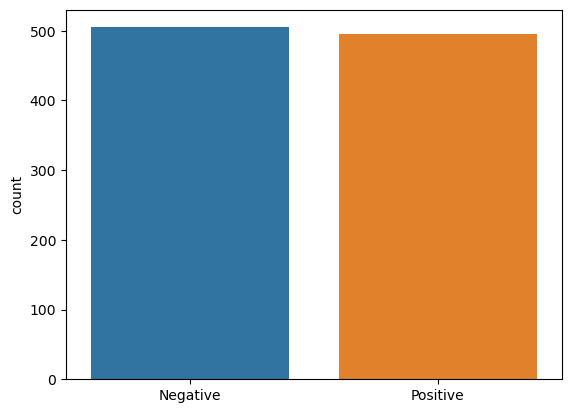

In [41]:
new_predictions = pd.DataFrame(new_predictions)
pred_counts = new_predictions.value_counts()
pred_df = pd.DataFrame(pred_counts)
pred_df.columns = ['count']
print(pred_df)
sns.barplot(x=['Negative', 'Positive'], y='count', data=pred_df)